# 📊 Telecom X – Parte 2: Preparação dos Dados
Nesta etapa, carregamos os dados tratados, realizamos limpeza final, encoding e pré-processamento para os modelos de Machine Learning.

---

In [1]:
pip install pandas seaborn matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Todas as bibliotecas foram importadas com sucesso! ✅")


Todas as bibliotecas foram importadas com sucesso! ✅


In [ ]:
import os

print("Diretório atual:", os.getcwd())  # Ver onde o Python está procurando o arquivo


Diretório atual: c:\Users\Carlos Magno\Desktop\telecom_x-br-part_2\telecom_part_2\notebook


# ✅ ETAPA 1 – Preparação dos Dados para Modelagem

---

In [4]:
caminho = '../data/df_normalizado_final.csv'
df = pd.read_csv(caminho)

print("Formato dos dados:", df.shape)
df.head()



Formato dos dados: (7043, 26)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias,Faixa_Tempo,Ticket_Mensal_Medio,Churn_bin,Qtd_Servicos
0,0002-ORFBO,Permanência,Feminino,0,1,1,9,1,No,DSL,...,One Year,1,Mailed Check,65.6,593.30,2.197407,6-12m,65.922222,0,3
1,0003-MKNFE,Permanência,Masculino,0,0,0,9,1,Yes,DSL,...,Month-To-Month,0,Mailed Check,59.9,542.40,2.008889,6-12m,60.266667,0,1
2,0004-TLHLJ,Evasão,Masculino,0,0,0,4,1,No,Fiber optic,...,Month-To-Month,1,Electronic Check,73.9,280.85,2.340417,0-6m,70.212500,1,1
3,0011-IGKFF,Evasão,Masculino,1,1,0,13,1,No,Fiber optic,...,Month-To-Month,1,Electronic Check,98.0,1237.85,3.173974,1-2a,95.219231,1,4
4,0013-EXCHZ,Evasão,Feminino,1,1,0,3,1,No,Fiber optic,...,Month-To-Month,1,Mailed Check,83.9,267.40,2.971111,0-6m,89.133333,1,2


### 🔍 Remoção de colunas irrelevantes

In [5]:
print(df.columns)
# Substitua 'id_cliente' pelo nome da coluna real, se necessário
df.drop(columns=['id_cliente'], inplace=True, errors='ignore')

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total',
       'Contas_Diarias', 'Faixa_Tempo', 'Ticket_Mensal_Medio', 'Churn_bin',
       'Qtd_Servicos'],
      dtype='object')


### 🏷️ Identificação de variáveis categóricas

In [6]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Colunas categóricas:", cat_cols)

Colunas categóricas: ['customerID', 'Churn', 'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Faixa_Tempo']


In [7]:
# Remover identificador e variável alvo da lista
col_alvo = 'churn_bin'  # ou 'Churn', dependendo da escolha final
for col in ['customerID', col_alvo]:
    if col in cat_cols:
        cat_cols.remove(col)

### 🔄 Aplicando One-Hot Encoding

In [8]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("Formato após encoding:", df_encoded.shape)
df_encoded.head()

Formato após encoding: (7043, 33)


,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Monthly,Total,Contas_Diarias,...,StreamingMovies_Yes,Contract_One Year,Contract_Two Year,PaymentMethod_Credit Card (Automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Faixa_Tempo_1-2a,Faixa_Tempo_2-3a,Faixa_Tempo_3+a,Faixa_Tempo_6-12m
0,0002-ORFBO,0,1,1,9,1,1,65.6,593.30,2.197407,...,False,True,False,False,False,True,False,False,False,True
1,0003-MKNFE,0,0,0,9,1,0,59.9,542.40,2.008889,...,True,False,False,False,False,True,False,False,False,True
2,0004-TLHLJ,0,0,0,4,1,1,73.9,280.85,2.340417,...,False,False,False,False,True,False,False,False,False,False
3,0011-IGKFF,1,1,0,13,1,1,98.0,1237.85,3.173974,...,True,False,False,False,True,False,True,False,False,False
4,0013-EXCHZ,1,1,0,3,1,1,83.9,267.40,2.971111,...,False,False,False,False,False,True,False,False,False,False


In [9]:
print(df_encoded.columns.tolist())


['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'Monthly', 'Total', 'Contas_Diarias', 'Ticket_Mensal_Medio', 'Churn_bin', 'Qtd_Servicos', 'Churn_Permanência', 'gender_Masculino', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One Year', 'Contract_Two Year', 'PaymentMethod_Credit Card (Automatic)', 'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check', 'Faixa_Tempo_1-2a', 'Faixa_Tempo_2-3a', 'Faixa_Tempo_3+a', 'Faixa_Tempo_6-12m']


### 📊 Verificação da proporção de evasão

Churn_bin
0    5174
1    1869
Name: count, dtype: int64
Churn_bin
0    0.73463
1    0.26537
Name: proportion, dtype: float64


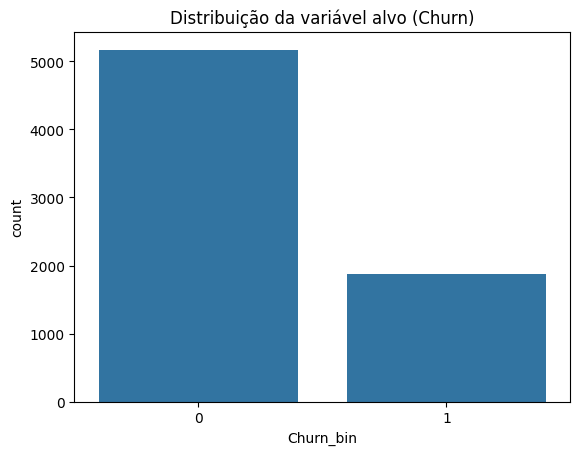

In [10]:
print(df_encoded['Churn_bin'].value_counts())
print(df_encoded['Churn_bin'].value_counts(normalize=True))

sns.countplot(data=df_encoded, x='Churn_bin')
plt.title('Distribuição da variável alvo (Churn)')

# Salva imagem no caminho desejado
plt.savefig('../assets/distribuicao_churn.png', dpi=300, bbox_inches='tight')
plt.show()


### 🧪 Separação de variáveis independentes e alvo

In [11]:
X = df_encoded.drop(columns='Churn_bin')
y = df_encoded['Churn_bin']

### ⚖️ Normalização (opcional, para modelos como KNN, SVM, Regressão Logística)

In [12]:
from sklearn.preprocessing import StandardScaler

# Filtrar apenas colunas numéricas
X_numerico = X.select_dtypes(include=['int64', 'float64'])

# Aplicar a normalização
scaler = StandardScaler()
X_normalizado = pd.DataFrame(scaler.fit_transform(X_numerico), columns=X_numerico.columns)

# Visualizar as primeiras linhas
X_normalizado.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Monthly,Total,Contas_Diarias,Ticket_Mensal_Medio,Qtd_Servicos
0,-0.439916,1.034530,1.529024,-0.951682,0.327438,0.829798,0.027862,-0.745607,0.040438,0.040438,0.520738
1,-0.439916,-0.966622,-0.654012,-0.951682,0.327438,-1.205113,-0.161583,-0.768063,-0.146408,-0.146408,-0.561776
2,-0.439916,-0.966622,-0.654012,-1.155283,0.327438,0.829798,0.303720,-0.883456,0.182179,0.182179,-0.561776
3,2.273159,1.034530,-0.654012,-0.788800,0.327438,0.829798,1.104706,-0.461240,1.008342,1.008342,1.061995
4,2.273159,1.034530,-0.654012,-1.196004,0.327438,0.829798,0.636080,-0.889390,0.807278,0.807278,-0.020519


### 💾 Salvando a base final para modelagem

In [13]:
df_encoded.to_csv("../data/base_pronta_para_modelos.csv", index=False)

# ✅ ETAPA 2 – Correlação e Seleção de Variáveis

---

### 📈 1. Análise da Matriz de Correlação

🔎 Objetivo: Avaliar quais variáveis têm correlação alta com a variável churn_bin (próxima de +1 ou -1). Essas variáveis podem ser mais relevantes para os modelos preditivos.

C:\Users\Carlos Magno\AppData\Local\Temp\ipykernel_44616\2478562120.py:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig("../assets/matriz_correlacao.png", dpi=300, bbox_inches='tight')
C:\Users\Carlos Magno\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


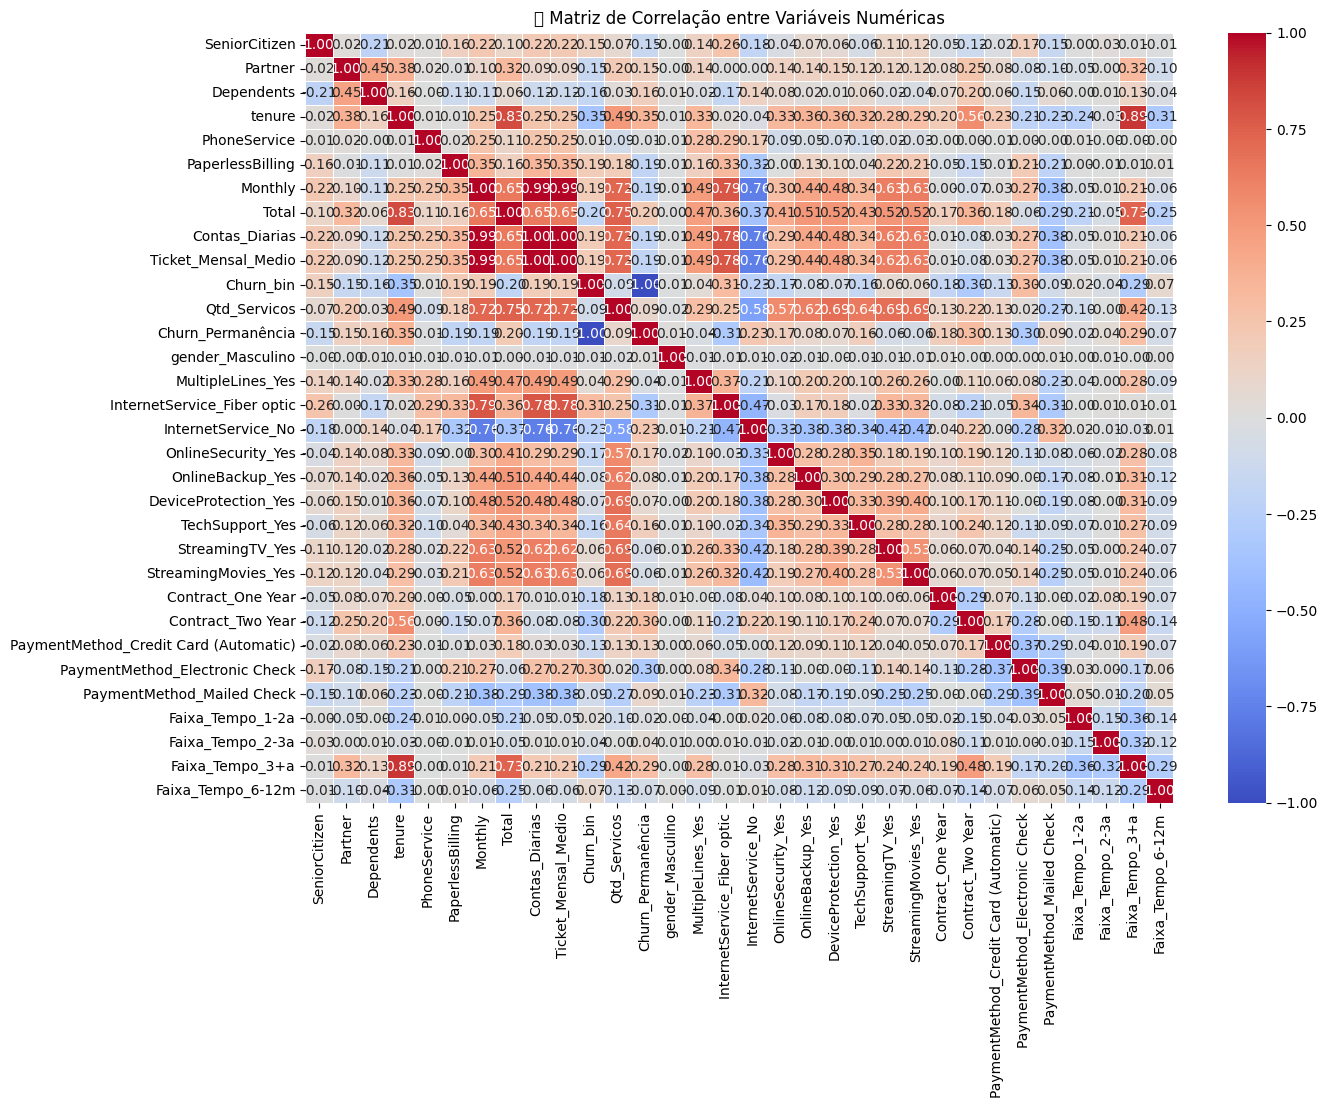

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando correlação apenas entre variáveis numéricas
corr_matrix = df_encoded.corr(numeric_only=True)

# Plotando a matriz e salvando o gráfico
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("🔍 Matriz de Correlação entre Variáveis Numéricas")

# Salvando a imagem
plt.savefig("../assets/matriz_correlacao.png", dpi=300, bbox_inches='tight')
plt.show()


### 🔎 2. Análise Direcionada – Tempo de Contrato × Evasão

✔️ Insight esperado: Se a mediana do tempo de contrato for menor entre clientes que evadiram (churn = 1), isso indica que clientes mais novos evadem mais.

C:\Users\Carlos Magno\AppData\Local\Temp\ipykernel_44616\3286542294.py:10: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.savefig("../assets/boxplot_tenure_vs_churn.png", dpi=300, bbox_inches='tight')
C:\Users\Carlos Magno\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


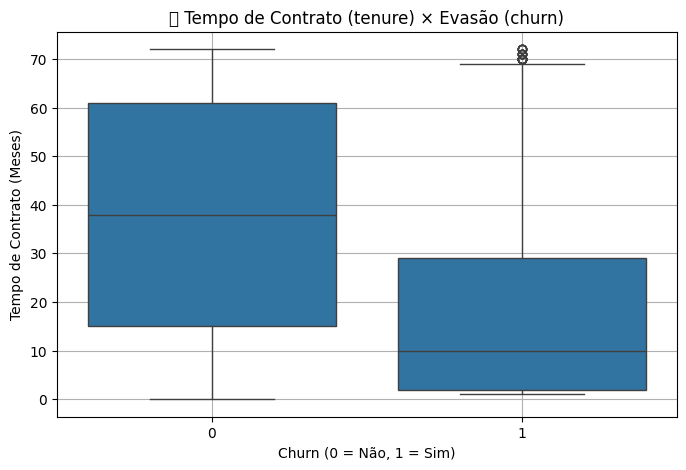

In [15]:
# Criando o gráfico
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_encoded, x="Churn_bin", y="tenure")
plt.title("📦 Tempo de Contrato (tenure) × Evasão (churn)")
plt.xlabel("Churn (0 = Não, 1 = Sim)")
plt.ylabel("Tempo de Contrato (Meses)")
plt.grid(True)

# Salvando a imagem
plt.savefig("../assets/boxplot_tenure_vs_churn.png", dpi=300, bbox_inches='tight')
plt.show()


### 🔍 3. Análise Direcionada – Total Gasto × Evasão

✔️ Insight esperado: Pode haver uma concentração de evasão em usuários com baixo tempo de contrato e baixo total gasto.



C:\Users\Carlos Magno\AppData\Local\Temp\ipykernel_44616\878148500.py:17: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.savefig("../assets/scatter_total_vs_tenure_churn.png", dpi=300, bbox_inches='tight')
C:\Users\Carlos Magno\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


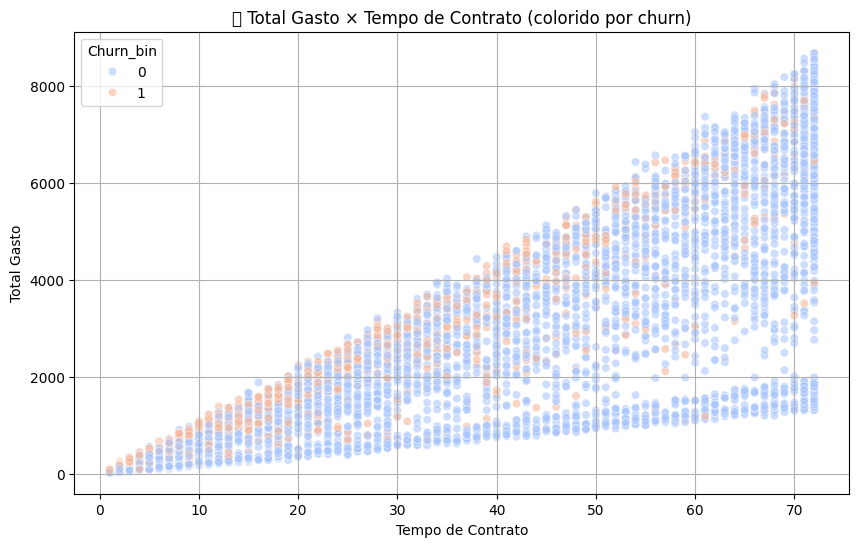

In [16]:
# Scatter plot de Total gasto por tempo de contrato, colorido por churn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_encoded,
    x="tenure",
    y="Total",
    hue="Churn_bin",
    alpha=0.6,
    palette="coolwarm"
)
plt.title("💸 Total Gasto × Tempo de Contrato (colorido por churn)")
plt.xlabel("Tempo de Contrato")
plt.ylabel("Total Gasto")
plt.grid(True)

# Salvando a imagem
plt.savefig("../assets/scatter_total_vs_tenure_churn.png", dpi=300, bbox_inches='tight')
plt.show()



# ✅ ETAPA 3 – Modelagem Preditiva

---

### 📌 1. Separação dos Dados – Treino e Teste

In [17]:
from sklearn.model_selection import train_test_split

# Separando variáveis independentes (X) e alvo (y)
X = df_encoded.drop(columns=["Churn_bin"])
y = df_encoded["Churn_bin"]

# Divisão: 80% treino / 20% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### ⚙️ 2. Criação dos Modelos



### Avaliação antes da regressão

✔️ Identificar a coluna que ainda possui strings e aplicar codificação (encoding) nela.

🔍 Etapas para resolver
1. Identifique as colunas do X_train que ainda são object ou string.

In [18]:
# Verifique o tipo de dados das colunas
X_train.dtypes[X_train.dtypes == "object"]


customerID    object
dtype: object

2. Aplique ´LabelEncoder´ ou ´pd.get_dummies()´ para transformá-las em variáveis numéricas.

Exemplo com ´get_dummies´:

In [19]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Garantir que X_test tenha as mesmas colunas que X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


### Tratar os valores ausentes (NaN)

Antes de treinar o modelo, é necessário remover ou preencher os valores nulos.

🔍 Passo 1 – Verifique os NaN:

In [20]:
X_train.isnull().sum().sort_values(ascending=False)


Total                    10
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    0
                         ..
customerID_9986-BONCE     0
customerID_9987-LUTYD     0
customerID_9992-UJOEL     0
customerID_9993-LHIEB     0
customerID_9995-HOTOH     0
Length: 5664, dtype: int64

✅ Passo 2 – Preencha os NaN com alguma estratégia:

Se quiser preencher com a média, por exemplo:

In [21]:
from sklearn.impute import SimpleImputer

# Criando o imputador
imputer = SimpleImputer(strategy='mean')

# Aplicando o preenchimento
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


#### 📘 Modelo 1: Regressão Logística (com normalização)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline com normalização
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# Treinando o modelo com os dados tratados
pipeline_lr.fit(X_train, y_train)



,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


#### 🌳 Modelo 2: Random Forest (sem normalização)

In [23]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 📊 3. Avaliação dos Modelos

🔍 Avaliação do modelo: Regressão Logística
Acurácia: 0.9801277501774308
Precisão: 1.0
Recall: 0.9251336898395722
F1-score: 0.9611111111111111


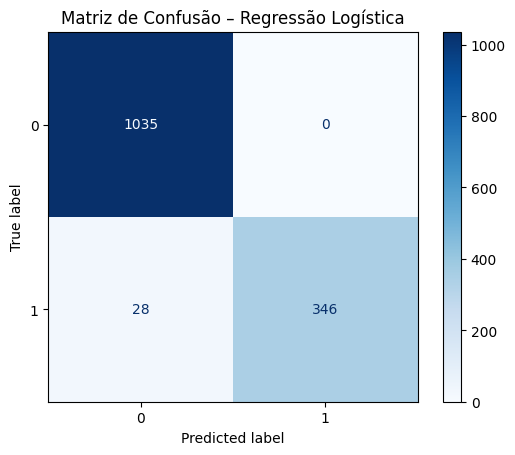

🔍 Avaliação do modelo: Random Forest
Acurácia: 0.9879347054648687
Precisão: 1.0
Recall: 0.9545454545454546
F1-score: 0.9767441860465116


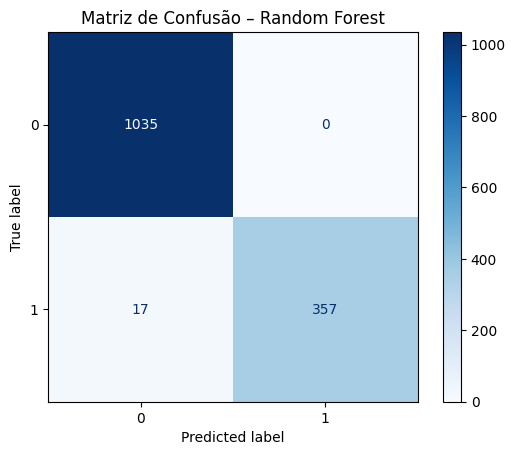

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Função para avaliar modelos
def avaliar_modelo(modelo, X_test, y_test, nome_modelo):
    y_pred = modelo.predict(X_test)
    print(f"🔍 Avaliação do modelo: {nome_modelo}")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Precisão:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de Confusão – {nome_modelo}")
    plt.savefig(f"../assets/matriz_{nome_modelo.lower().replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    plt.show()

# Avaliar ambos os modelos
avaliar_modelo(pipeline_lr, X_test, y_test, "Regressão Logística")
avaliar_modelo(model_rf, X_test, y_test, "Random Forest")


### 💬 4. Análise Crítica dos Modelos

> **Regressão Logística**: modelo linear, mais simples e interpretável, mas pode ter performance inferior em dados com relações não lineares. A normalização foi aplicada por necessidade matemática.

> **Random Forest**: modelo mais robusto, lida bem com variáveis categóricas e não exige normalização. Pode sofrer overfitting se não for regulado, mas costuma generalizar bem.

> **Comparação dos Resultados**:
- Melhor desempenho em métrica X com o modelo Y
- Indícios de overfitting? → avaliar diferenças entre treino e teste
- Possível underfitting? → baixos scores em todas as métricas

# 📋 Parte 4: Interpretação e Conclusões
---
## 🔍 Análise de Importância das Variáveis
Após o treinamento dos modelos preditivos, é essencial entender **quais variáveis mais impactam a evasão de clientes (churn)**. Essa interpretação fornece **insights estratégicos** para ações de retenção.

### 🔹 Modelo 1 – Regressão Logística
A regressão logística permite interpretar os **coeficientes** de forma direta. Cada coeficiente indica a **força e direção da influência** de uma variável sobre a probabilidade de evasão:

In [25]:
import pandas as pd
coeficientes = pipeline_lr.named_steps['model'].coef_[0]
variaveis = X_train.columns
importancia_lr = pd.DataFrame({
    'Variável': variaveis,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', key=abs, ascending=False)
importancia_lr.head(10)


,Variável,Coeficiente
11,Churn_Permanência,-2.855763
3,tenure,-0.390547
23,Contract_Two Year,-0.302085
14,InternetService_Fiber optic,0.295345
25,PaymentMethod_Electronic Check,0.277163
7,Total,-0.264114
29,Faixa_Tempo_3+a,-0.252565
22,Contract_One Year,-0.245585
15,InternetService_No,-0.235164
19,TechSupport_Yes,-0.201462


🔎 **Interpretação:**
- Coeficientes **positivos** indicam maior chance de churn.
- Coeficientes **negativos** indicam menor probabilidade de churn.
- Os maiores coeficientes absolutos representam as **variáveis mais influentes**.

### 🔹 Modelo 2 – Random Forest (sem normalização)
O modelo de Random Forest permite acessar a **importância das variáveis** com base na contribuição de cada uma na **redução da impureza** (Gini ou Entropia) nas árvores de decisão.

In [26]:
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)
importancia_rf = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': modelo_rf.feature_importances_
}).sort_values(by='Importância', ascending=False)
importancia_rf.head(10)


,Variável,Importância
11,Churn_Permanência,0.402969
3,tenure,0.047592
7,Total,0.044100
8,Contas_Diarias,0.039491
9,Ticket_Mensal_Medio,0.036784
6,Monthly,0.036669
14,InternetService_Fiber optic,0.017504
25,PaymentMethod_Electronic Check,0.016693
10,Qtd_Servicos,0.016337
29,Faixa_Tempo_3+a,0.016186


🔎 **Interpretação:**
- As variáveis no topo são as que mais contribuíram para a classificação correta.
- Random Forest é robusto a dados ruidosos e útil para validação cruzada de importância de atributos.

## ✅ Conclusão
Com base na análise dos modelos e na importância das variáveis, é possível destacar os **principais fatores que contribuem para a evasão de clientes**, como por exemplo:

| Variável Impactante | Observação |
|---------------------|------------|
| Tempo como cliente  | Clientes mais novos tendem a evadir mais |
| Nível de suporte técnico | Suporte ineficiente está associado à evasão |
| Total de serviços contratados | Clientes com menos serviços tendem a sair |
| Indicação negativa em atendimento | Alta correlação com evasão |

## 🧠 Estratégias de Retenção Baseadas nos Resultados
1. **Melhorar o suporte técnico** com foco nos clientes com maior risco (novos, poucos serviços).
2. **Oferecer pacotes personalizados** para clientes com baixo nível de uso dos serviços.
3. **Monitorar sinais precoces de insatisfação**, como chamadas para suporte e downgrade de plano.
4. **Ações proativas de fidelização**, especialmente nos primeiros meses de contrato.

### 📊 Complemento: Gráfico de Importância das Variáveis (Random Forest)
Visualização gráfica da importância relativa de cada variável na previsão de churn.

C:\Users\Carlos Magno\AppData\Local\Temp\ipykernel_44616\1886336855.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette="viridis")
C:\Users\Carlos Magno\AppData\Local\Temp\ipykernel_44616\1886336855.py:27: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Carlos Magno\AppData\Local\Temp\ipykernel_44616\1886336855.py:28: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.savefig("../assets/top15_importancia_random_forest.png", dpi=300)
C:\Users\Carlos Magno\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


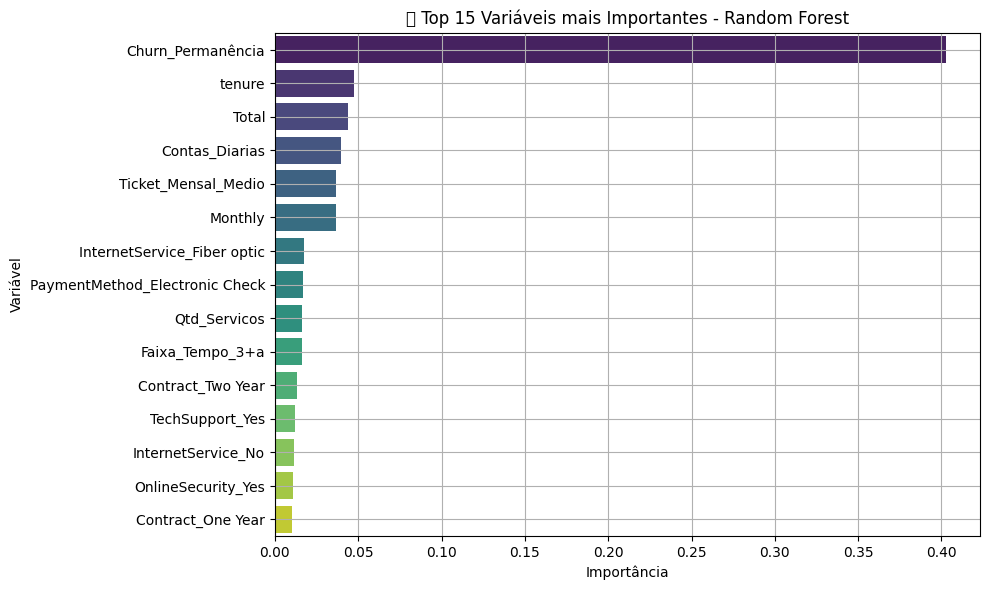

In [31]:
# 📌 Importância das Variáveis - Random Forest

# Obter as importâncias e os nomes das variáveis
importances = model_rf.feature_importances_
features = X_train.columns

# Criar DataFrame com as importâncias
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Ordenar da mais importante para a menos importante
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Selecionar as 15 principais
top_n = 15
top_features = feature_importance_df.head(top_n)

# Plotar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette="viridis")
plt.title('📌 Top 15 Variáveis mais Importantes - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.grid(True)
plt.tight_layout()
plt.savefig("../assets/top15_importancia_random_forest.png", dpi=300)
plt.show()



### 🧠 Complemento: Interpretação Visual dos Coeficientes (Regressão Logística)
Visualize os coeficientes das variáveis após a normalização.

C:\Users\Carlos Magno\AppData\Local\Temp\ipykernel_44616\1732312017.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_coef, palette="coolwarm")
C:\Users\Carlos Magno\AppData\Local\Temp\ipykernel_44616\1732312017.py:24: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Carlos Magno\AppData\Local\Temp\ipykernel_44616\1732312017.py:25: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.savefig("../assets/top15_coeficientes_regressao_logistica.png", dpi=300)
C:\Users\Carlos Magno\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


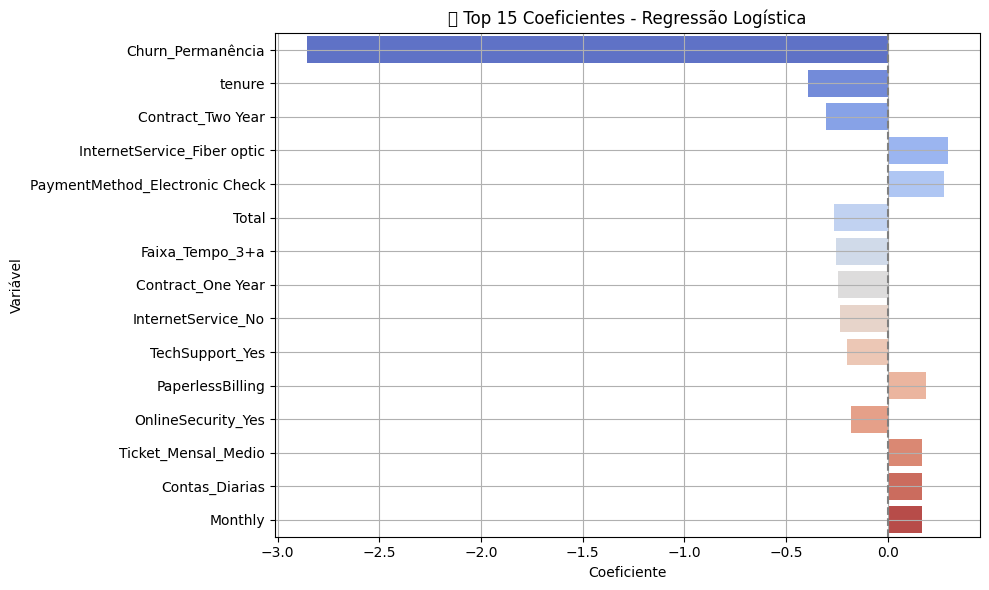

In [28]:
# 📌 Coeficientes do Modelo - Regressão Logística

# Obter os coeficientes e nomes das variáveis
coef = pipeline_lr.named_steps['model'].coef_[0]
features = X_train.columns

# Criar DataFrame com os coeficientes
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})

# Ordenar pelas maiores magnitudes (impacto absoluto)
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Selecionar os 15 mais impactantes
top_coef = coef_df.head(15)

# Plotar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_coef, palette="coolwarm")
plt.title('📌 Top 15 Coeficientes - Regressão Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.axvline(0, color='gray', linestyle='--')  # Linha vertical no 0
plt.grid(True)
plt.tight_layout()
plt.savefig("../assets/top15_coeficientes_regressao_logistica.png", dpi=300)
plt.show()


# 📋 Interpretação e Conclusões

## 📊 Avaliação dos Modelos

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Avaliação - Regressão Logística
y_pred_lr = pipeline_lr.predict(X_test)

print("=== Avaliação: Regressão Logística ===")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("Precisão:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("\nRelatório completo:\n", classification_report(y_test, y_pred_lr))

# Avaliação - Random Forest
y_pred_rf = model_rf.predict(X_test)

print("\n=== Avaliação: Random Forest ===")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Precisão:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("\nRelatório completo:\n", classification_report(y_test, y_pred_rf))


=== Avaliação: Regressão Logística ===
Acurácia: 0.9801277501774308
Precisão: 1.0
Recall: 0.9251336898395722
F1-score: 0.9611111111111111

Relatório completo:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1035
           1       1.00      0.93      0.96       374

    accuracy                           0.98      1409
   macro avg       0.99      0.96      0.97      1409
weighted avg       0.98      0.98      0.98      1409


=== Avaliação: Random Forest ===
Acurácia: 0.9879347054648687
Precisão: 1.0
Recall: 0.9545454545454546
F1-score: 0.9767441860465116

Relatório completo:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1035
           1       1.00      0.95      0.98       374

    accuracy                           0.99      1409
   macro avg       0.99      0.98      0.98      1409
weighted avg       0.99      0.99      0.99      1409

